In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

**Prediction evaluation (VCMPR@k and centralities)**

In [3]:
from utils.evaluation import evaluate_all
import networkx as nx
from functools import partial
from diffusion.jackson_metrics import diffusion_centrality
eigen = partial(nx.eigenvector_centrality_numpy)
degree = partial(nx.degree_centrality)
diffusion = partial(diffusion_centrality, T=5)
names = ["eigenvector_centrality"]

data_names = ["wiki"]
result, k_dict, metrics_dict = evaluate_all(model_name="gat", list_of_data=data_names, 
                      method_list=[eigen], 
                      method_names=names)

wiki: 100%|█████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.11it/s]


In [4]:
k_dict

{'wiki': 2}

In [5]:
metrics_dict

{'wiki': {'AVG VCMPR@2': 0.5480571389198303}}

In [6]:
result[0]

,node_index,vcmpr_IB_min2,eigenvector_centrality_train,eigenvector_centrality_true,eigenvector_centrality_pred,dataset
0,0,0.666667,0.001268,0.001196,0.001308,wiki
1,1,0.888889,0.012104,0.012497,0.012973,wiki
2,2,0.571429,0.000177,0.000189,0.000284,wiki
3,3,0.800000,0.028228,0.027379,0.029021,wiki
4,4,0.750000,0.037455,0.033685,0.036026,wiki
...,...,...,...,...,...,...
2225,2400,1.000000,0.000518,0.000415,0.000511,wiki
2226,2401,0.428571,0.001941,0.002150,0.002507,wiki
2227,2402,0.625000,0.002480,0.002593,0.003091,wiki
2228,2403,0.333333,0.000263,0.000257,0.000386,wiki


**Evaluate diffusion**

In [36]:
from utils.difffusion_evaluation import evaluate_all

data_names = ["wiki"]
result = evaluate_all(model_name="gat",
                      list_of_data=data_names,
                      eval_type='s')


['data/results/gat/wiki_seed_0.pkl', 'data/results/gat/wiki_seed_1.pkl', 'data/results/gat/wiki_seed_2.pkl', 'data/results/gat/wiki_seed_3.pkl', 'data/results/gat/wiki_seed_4.pkl', 'data/results/gat/wiki_seed_5.pkl', 'data/results/gat/wiki_seed_6.pkl', 'data/results/gat/wiki_seed_7.pkl', 'data/results/gat/wiki_seed_8.pkl', 'data/results/gat/wiki_seed_9.pkl']


Running evaluations: 100%|███████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 128.68it/s]


In [37]:
result[0].keys()

dict_keys(['true_si', 'pred_si', 'info_vulnerability', 'metrics'])

In [38]:
import pandas as pd

# Stack all DataFrames along a new axis, then calculate the mean across all files for each node
stacked_df = pd.concat(result[0]["info_vulnerability"], axis=0).groupby(level=0).mean()

# Calculate the mean error columns
stacked_df['vulnerability_error'] = stacked_df["true_vulnerability"] - stacked_df["pred_vulnerablity"]
stacked_df['recency_error'] = stacked_df['true_recency'] - stacked_df['pred_recency']

# Display the resulting DataFrame
stacked_df

,true_vulnerability,true_recency,pred_vulnerablity,pred_recency,degree,file,vulnerability_error,recency_error
0,0.008,0.002669,0.006,0.001640,5.0,4.5,0.002,0.001030
1,0.046,0.004964,0.043,0.005229,14.0,4.5,0.003,-0.000265
2,0.002,0.000167,0.004,0.001367,4.0,4.5,-0.002,-0.001200
3,0.054,0.006740,0.048,0.006233,22.0,4.5,0.006,0.000507
4,0.052,0.006063,0.042,0.006623,13.0,4.5,0.010,-0.000560
...,...,...,...,...,...,...,...,...
2400,0.005,0.000922,0.000,0.000000,6.0,4.5,0.005,0.000922
2401,0.017,0.002878,0.009,0.000783,5.0,4.5,0.008,0.002096
2402,0.024,0.002628,0.015,0.001184,6.0,4.5,0.009,0.001444
2403,0.004,0.001234,0.007,0.000942,3.0,4.5,-0.003,0.000292


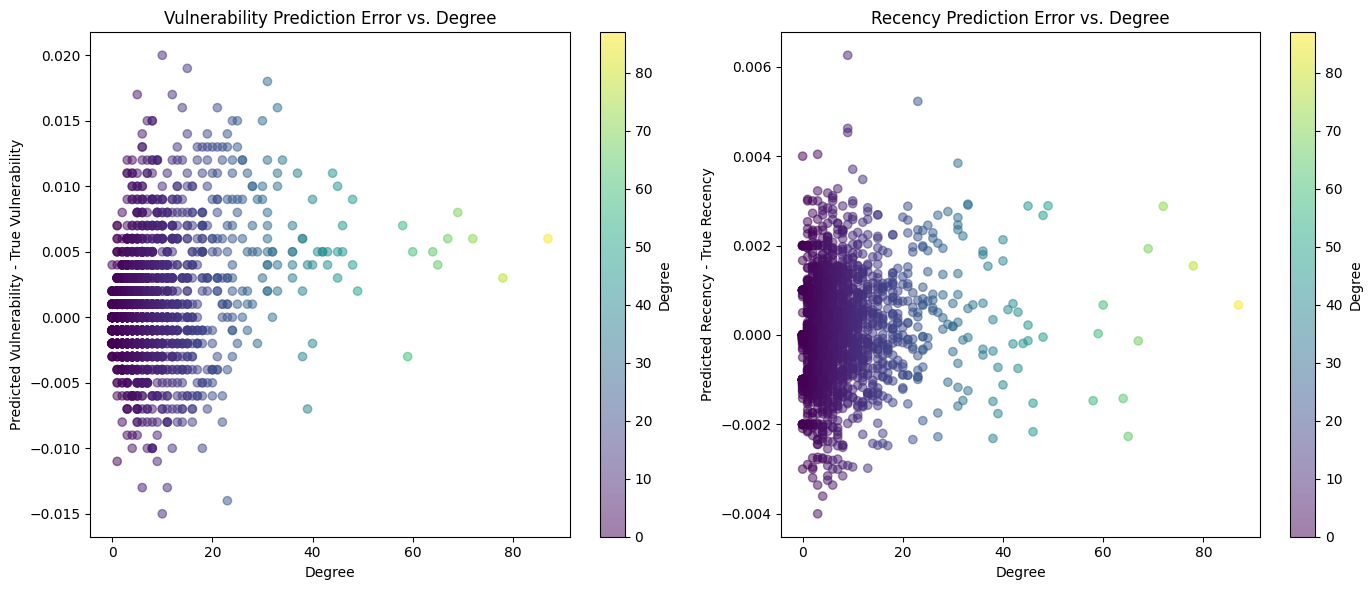

In [39]:
import matplotlib.pyplot as plt 

# Plotting prediction error for vulnerability vs degree
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(stacked_df['degree'], stacked_df['vulnerability_error'], alpha=0.5, c=stacked_df['degree'], cmap='viridis')
plt.colorbar(label='Degree')
plt.xlabel('Degree')
plt.ylabel('Predicted Vulnerability - True Vulnerability')
plt.title('Vulnerability Prediction Error vs. Degree')

# Plotting prediction error for recency vs degree
plt.subplot(1, 2, 2)
plt.scatter(stacked_df['degree'], stacked_df['recency_error'], alpha=0.5, c=stacked_df['degree'], cmap='viridis')
plt.colorbar(label='Degree')
plt.xlabel('Degree')
plt.ylabel('Predicted Recency - True Recency')
plt.title('Recency Prediction Error vs. Degree')

plt.tight_layout()
plt.show()